## Netflix EDA

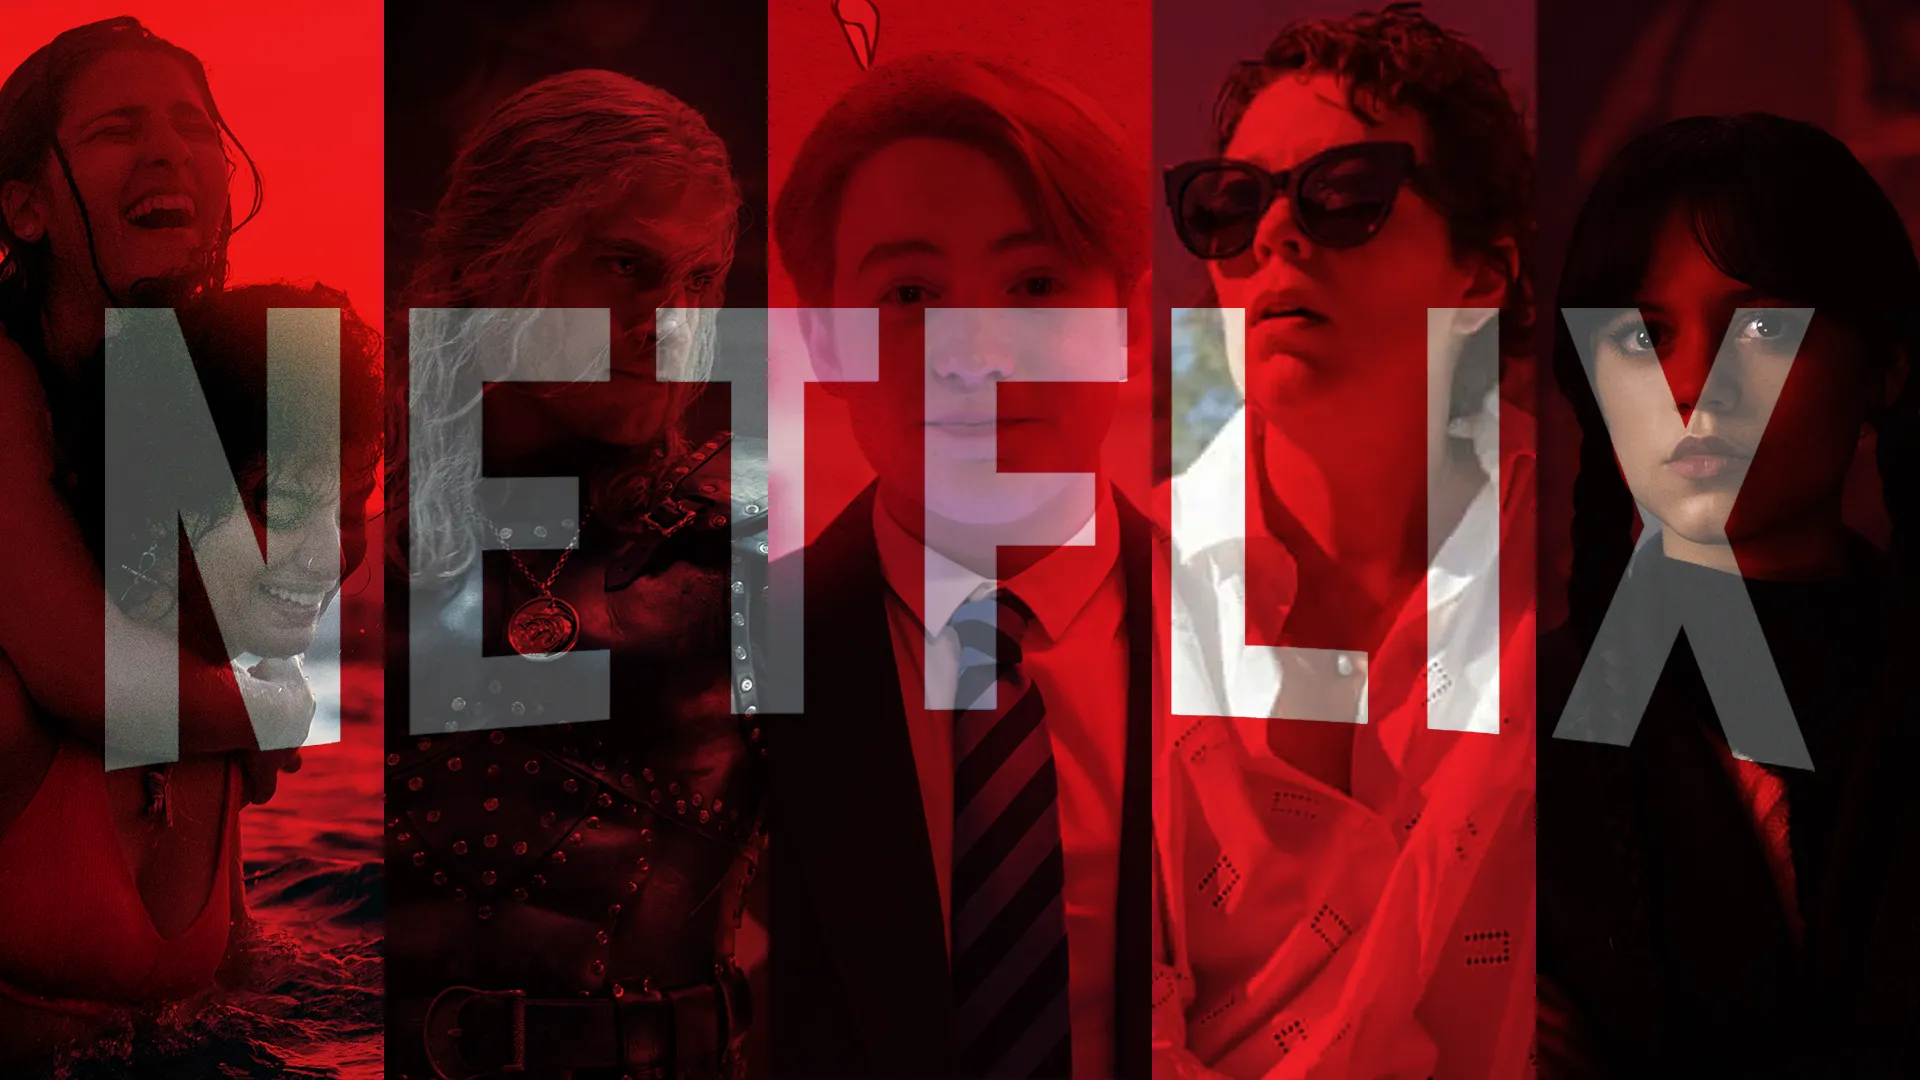

In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
import squarify


In [88]:
df_netflix = pd.read_csv('netflix_titles.csv/netflix_titles.csv')
df_netflix.head(5)

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [89]:
df_netflix.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Now checking the missing values via graph(heatmaps)

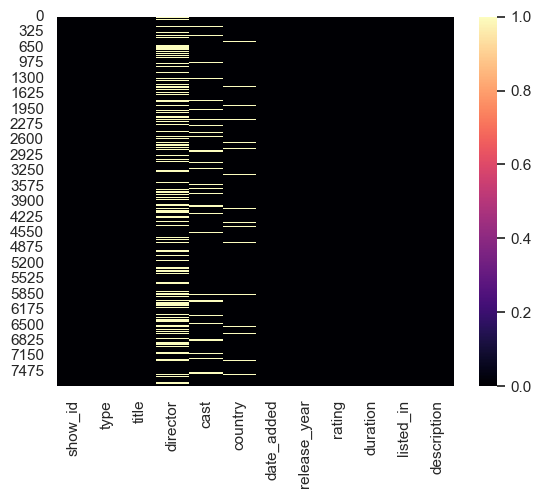

In [90]:
ax = sns.heatmap(df_netflix.isnull() ,cbar = {'orientation' :'horizontal'},
                 cmap = 'magma')
# rating and date_added wqont be shown in heatmaps ,for accuracy go for df_netlfix.isnull().sum()

 * director - 2389
 * cast - 718 
 * country - 507
 * date_added - 10 
 * rating - 7
 are having empty spaces. 
we can drop all missing rows w.r.t director,cast and fill country , date_added and rating

Now first lets add all the missing values that is country ,date_added,rating

In [91]:
df_netflix['country'] = df_netflix['country'].fillna(df_netflix['country'].mode()[0])
df_netflix['date_added'] = df_netflix['date_added'].fillna(df_netflix['date_added'].mode()[0])
df_netflix['rating'] = df_netflix['rating'].fillna(df_netflix['rating'].mode()[0])

Now dropping all empty space rows in director and cast column

In [92]:
df_netflix = df_netflix.dropna(how = 'any' , subset = ['director','cast'])

In [93]:
#now thr are no empty spaces now
df_netflix.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Now checking if there are any duplicated values

In [94]:
df_netflix.duplicated().sum()

0

In [95]:
df_netflix.head(3)

show_id   type  title           director  \
1      s2  Movie   7:19  Jorge Michel Grau   
2      s3  Movie  23:59       Gilbert Chan   
3      s4  Movie      9        Shane Acker   

                                                cast        country  \
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   

          date_added  release_year rating duration  \
1  December 23, 2016          2016  TV-MA   93 min   
2  December 20, 2018          2011      R   78 min   
3  November 16, 2017          2009  PG-13   80 min   

                                           listed_in  \
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   

                                         description  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...

Adding new column
* listed_in -> Genre

1) Now renaming the `listed_in column` as `Genre`  
2) `.apply(lambda x: x.split(",")[0])`: We're telling the table to go through each cell in the 'Genre' column and split text using commas(comma's are already present in Genre ,loook closely,now we are just splitting. Then, we keep only the first part. It's like simplifying a list of genres to just one genre per cell, in case there are multiple.


In [96]:
df_netflix = df_netflix.rename( columns = { "listed_in" :"Genre"})
df_netflix['Genre'] = df_netflix['Genre'].apply(lambda x : x.split(',')[0])
df_netflix.head(2)

show_id   type  title           director  \
1      s2  Movie   7:19  Jorge Michel Grau   
2      s3  Movie  23:59       Gilbert Chan   

                                                cast    country  \
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...     Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...  Singapore   

          date_added  release_year rating duration          Genre  \
1  December 23, 2016          2016  TV-MA   93 min         Dramas   
2  December 20, 2018          2011      R   78 min  Horror Movies   

                                         description  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...

Now look at `date_added` August 14, 2020  
it contains               month , date ,year. 
Lets split it as month and year.

 `df_netflix['Month_added'] = df_netflix['date_added'].split(" ")[0]`  
 ```python 
 AttributeError: 'Series' object has no attribute 'split' 
 ```
 so using `.apply(x : x.split(" ")[0]`  
 We're telling the table to go through each cell in the 'Genre' column and split text using commas. Then, we keep only the first part. It's like simplifying a list of genres to just one genre per cell, in case there are multiple.   
**Issue**  
The issue is that `date_added` is in object format because of mixture of data types  
so we need to convert it to string so we that we can use string 
 

In [97]:
df_netflix['date_added'] = df_netflix['date_added'].astype(str)

Now we are creating `Month_add` and extracting the month from `date_added` column

In [98]:
df_netflix['Month_add'] = df_netflix['date_added'].apply(lambda x : x.split(' ')[0])

Now creating `Year_add` by splitting `date_added` using lambda and split

In [99]:
df_netflix['Year_add'] = df_netflix['date_added'].apply(lambda x : x.split(",")[-1])
df_netflix['Year_add'].head(5)

1     2016
2     2018
3     2017
4     2020
5     2017
Name: Year_add, dtype: object

In [100]:
df_netflix.head(5)

show_id     type  title           director  \
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   
5      s6  TV Show     46        Serdar Akar   

                                                cast        country  \
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   
5  Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...         Turkey   

          date_added  release_year rating  duration                   Genre  \
1  December 23, 2016          2016  TV-MA    93 min                  Dramas   
2  December 20, 2018          2011      R    78 min           Horror Movies   
3  November 16, 2017          2009  PG-13    80 min      Action & Adventure   
4    January 1, 2020          2008  PG-13   123 min                  Dramas   
5       July 1, 2017          2016  TV-MA  1 Season  International TV Shows   

                                         description Month_add Year_add  
1  After a devastating earthquake hits Mexico Cit...  December     2016  
2  When an army recruit is found dead, his fellow...  December     2018  
3  In a postapocalyptic world, rag-doll robots hi...  November     2017  
4  A brilliant group of students become card-coun...   January     2020  
5  A genetics professor experiments with a treatm...      July     2017

Their are different `types` and `Genre` so lets understand them

In [101]:
df_netflix['type'].value_counts()

type
Movie      4834
TV Show     145
Name: count, dtype: int64

|    Type   |  Count  |
|:---------:|:-------:|
|   Movie   |  5377   |
|  TV Show  |  2410   |

In [102]:
df_netflix['Genre'].value_counts()

Genre
Dramas                          1372
Comedies                        1054
Action & Adventure               711
Children & Family Movies         453
Documentaries                    365
Stand-Up Comedy                  296
Horror Movies                    243
International Movies             109
Classic Movies                    69
Thrillers                         49
International TV Shows            43
Movies                            32
Crime TV Shows                    31
Independent Movies                20
British TV Shows                  20
Anime Features                    18
Music & Musicals                  17
Kids' TV                          11
Sci-Fi & Fantasy                  11
Cult Movies                       11
Anime Series                       9
Docuseries                         9
Stand-Up Comedy & Talk Shows       7
TV Shows                           6
Romantic Movies                    3
TV Comedies                        3
TV Action & Adventure           

At first lets divide the DataFrame into two parts:  
1. Movie  
2. TV Show

In [103]:
Movie_df = df_netflix[df_netflix['type'] == 'Movie']
TvShow_df = df_netflix[df_netflix['type'] == 'TV Show']

## Using graphs to understand better

Generally lets find out Movie vs TV Show

|   **Style**  | **context**  |
|:------------------:|:---------------:|
|       white        |     poster      |
|       dark         |      paper      |
|     whitegrid      |    notebook     |
|     darkgrid       |      talk       |
|       ticks        |                |




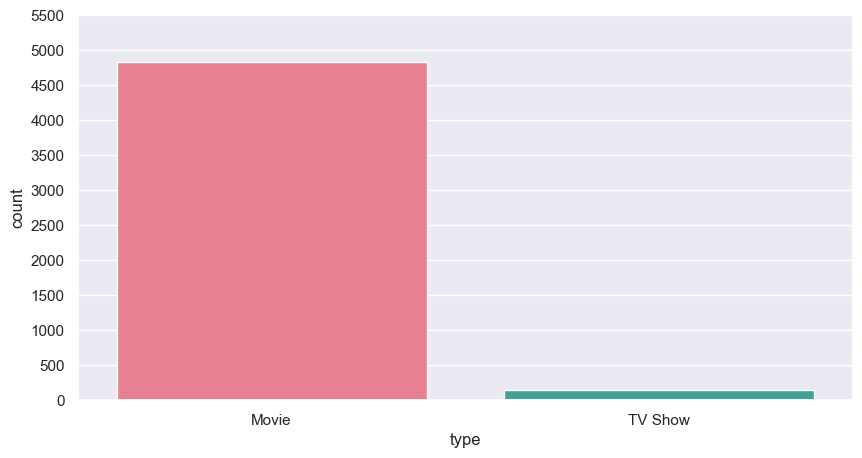

In [104]:
fig ,ax = plt.subplots(figsize = (10,5))
#plotting 
ax = sns.countplot( data = df_netflix ,
                    x = 'type' ,
                    palette = 'husl',
                    order =  ['Movie','TV Show'])
#increasing the tick length 
ax.set_yticks(range(0, 6000, 500));
#Styling 
sns.set( style = 'darkgrid',
         context = 'notebook')


Movies vs Tv Shows based on Genre

Now lets see different ratings in Movies  

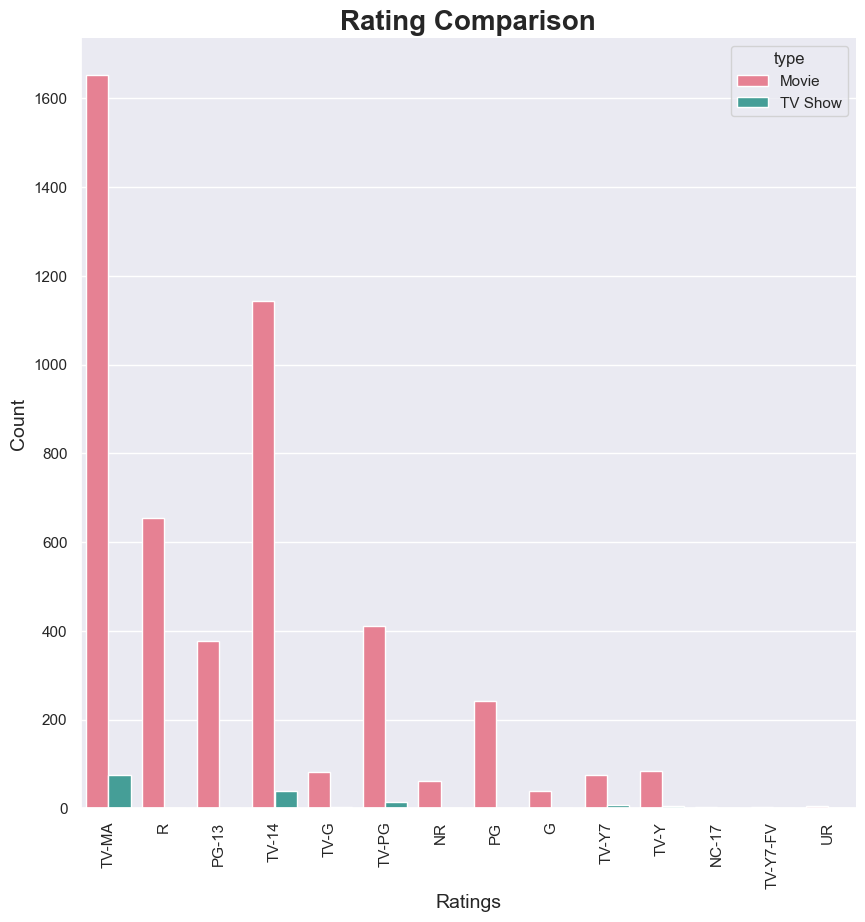

In [105]:
ax , fig = plt.subplots(figsize = (10,10))
ax = sns.countplot(data = df_netflix ,
                   x = 'rating' ,
                   hue = 'type',
                   palette = 'husl')
plt.xticks(rotation = 90);
sns.despine()
# labelling 
ax.set_xlabel('Ratings', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Rating Comparison', fontsize=20, fontweight = "bold")
#Styling
sns.set(style = 'darkgrid',
       context = 'notebook')
        
       

Say i only wanted to plot Movie and check rating then i can do it in 2 ways: 
1. Make a new data frame containg only 'Movie type' in it
    ```python 
    df_netflix['Movie_df'] = df_netflix[df_netflix['type'] == 'Movie']
    ```
 2. in countplot directly filter the type while mentioning data type


- `order=['rating'].value_counts().index[0:15]`: We're specifying the order of the bars based on the 15 most common ratings in 'movie_df'.

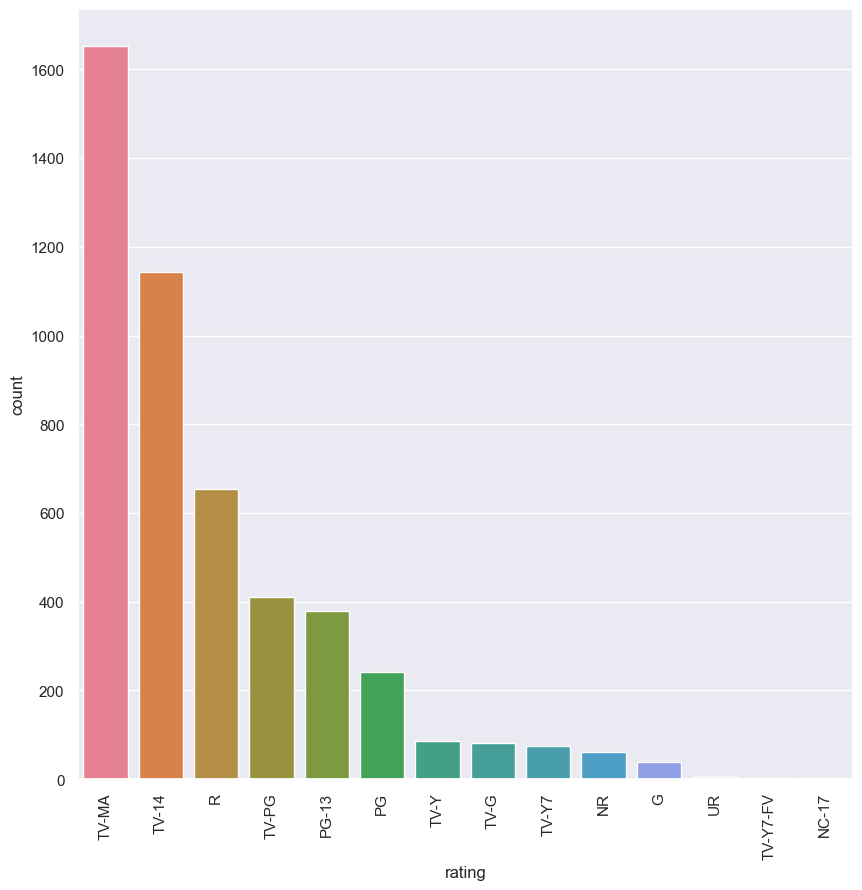

In [106]:
sns.set(style='darkgrid', context='notebook')
fig, ax = plt.subplots(figsize=(10, 10))
sns.countplot(data=df_netflix[df_netflix['type'] == 'Movie'], 
              x='rating', 
              palette='husl',
              order=df_netflix['rating'].value_counts().index[0:15]);
plt.xticks(rotation=90);


what we understand from the gragh is that in movies 
1. TV-MA - Mature content highest
2. TV-14
3. R -R Rated

Similarly lets find out for TV shows,which kind of TV shows are watched

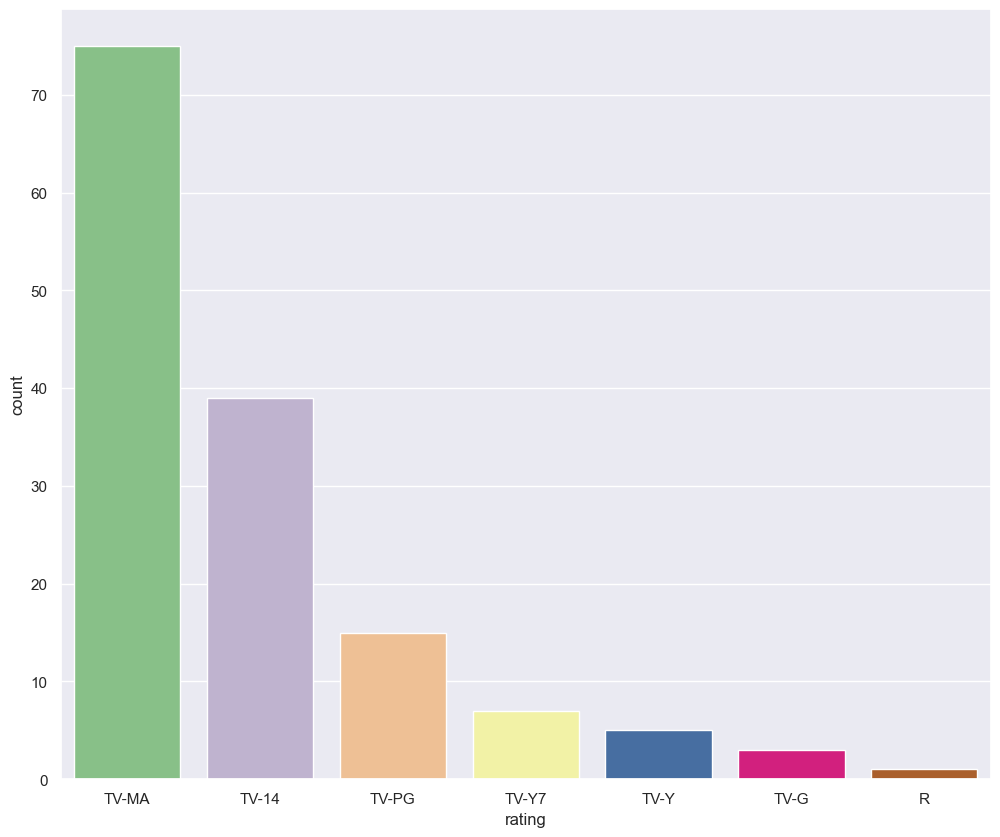

In [107]:
#plotting
ax , fig = plt.subplots(figsize = (12,10))
ax = sns.countplot(data = TvShow_df ,
                  x = 'rating' ,
                  palette = 'Accent',
                  order = TvShow_df['rating'].value_counts().index[0:15])
#Styling and labelling
sns.set( style = 'darkgrid',
        context = 'notebook')

In [108]:
df_netflix.head(3)

show_id   type  title           director  \
1      s2  Movie   7:19  Jorge Michel Grau   
2      s3  Movie  23:59       Gilbert Chan   
3      s4  Movie      9        Shane Acker   

                                                cast        country  \
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   

          date_added  release_year rating duration               Genre  \
1  December 23, 2016          2016  TV-MA   93 min              Dramas   
2  December 20, 2018          2011      R   78 min       Horror Movies   
3  November 16, 2017          2009  PG-13   80 min  Action & Adventure   

                                         description Month_add Year_add  
1  After a devastating earthquake hits Mexico Cit...  December     2016  
2  When an army recruit is found dead, his fellow...  December     2018  
3  In a postapocalyptic world, rag-doll robots hi...  November     2017

Now based on release_year lets  lets see how many movies and TV Shows were out

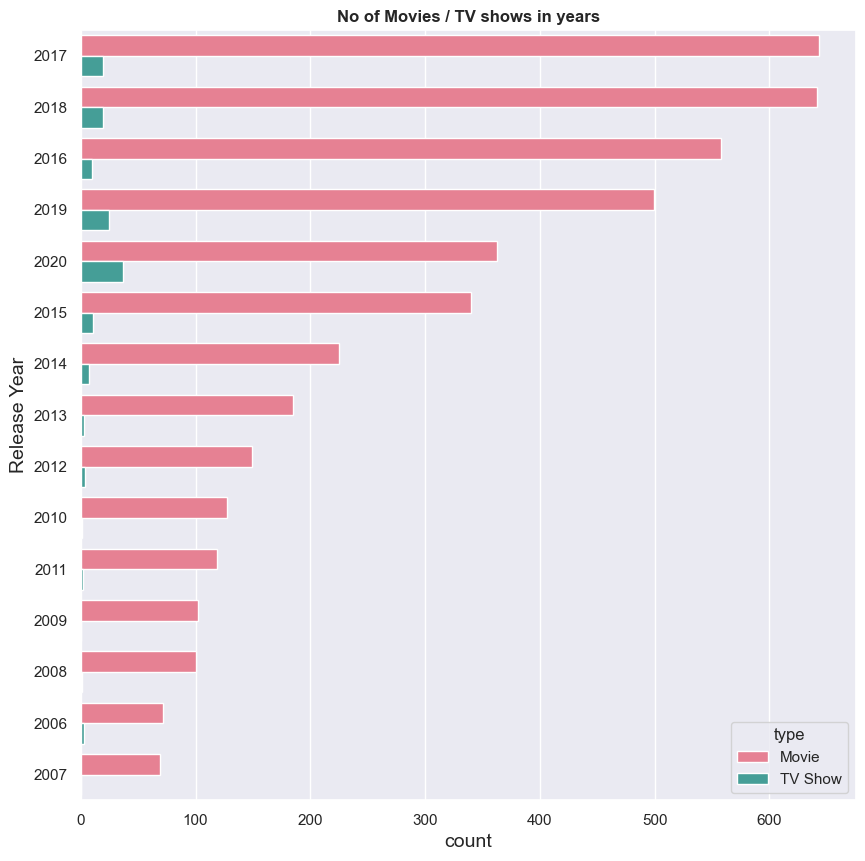

In [109]:
ax , fig = plt.subplots(figsize = (10,10))
ax = sns.countplot(data = df_netflix,
                   y = df_netflix['release_year'],
                   hue = df_netflix['type'],
                   palette = 'husl',
                   order = df_netflix['release_year'].value_counts().index[0:15])
#Styling 
ax.set_xlabel('count',fontsize = 14);
ax.set_ylabel('Release Year',fontsize = 14);
ax.set_title('No of Movies / TV shows in years',fontweight = 'bold');

## Movie duration Analysis

At first lets remove min from duration and convert object to int

In [110]:
Movie_df['duration'] = Movie_df['duration'].str.replace('min', '', regex=False)

In [111]:
Movie_df.head(3)

show_id   type  title           director  \
1      s2  Movie   7:19  Jorge Michel Grau   
2      s3  Movie  23:59       Gilbert Chan   
3      s4  Movie      9        Shane Acker   

                                                cast        country  \
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   

          date_added  release_year rating duration               Genre  \
1  December 23, 2016          2016  TV-MA      93               Dramas   
2  December 20, 2018          2011      R      78        Horror Movies   
3  November 16, 2017          2009  PG-13      80   Action & Adventure   

                                         description Month_add Year_add  
1  After a devastating earthquake hits Mexico Cit...  December     2016  
2  When an army recruit is found dead, his fellow...  December     2018  
3  In a postapocalyptic world, rag-doll robots hi...  November     2017

In [112]:
Movie_df['duration'] = Movie_df['duration'].astype(int)

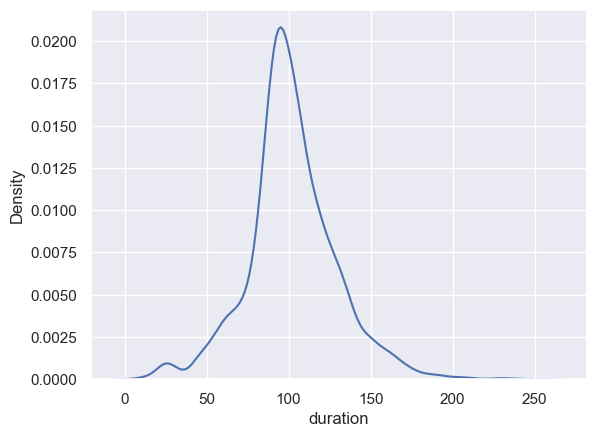

In [113]:
#plotting and checking duration of movies
fig ,ax = plt.subplots()
ax = sns.kdeplot(data = Movie_df,
                 x = Movie_df['duration'],
                 palette = 'husl')

Now lets see how movie duration has changed over years

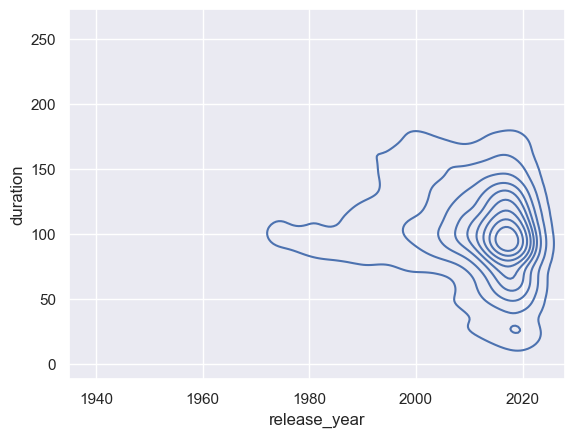

In [114]:
fig ,ax = plt.subplots()
ax = sns.kdeplot(data = Movie_df,
                 x = Movie_df['release_year'],
                 y = Movie_df['duration'])

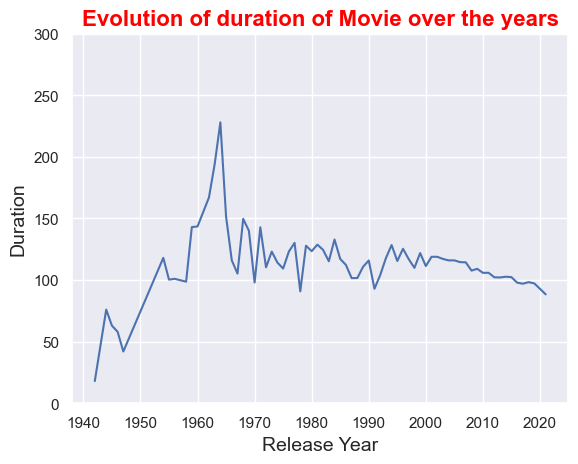

In [115]:
fig , ax = plt.subplots()
ax = sns.lineplot(data = Movie_df ,
                 x = Movie_df['release_year'] ,
                 y = Movie_df['duration'],
                 ci = None)
ax.set_xlabel('Release Year',fontsize = 14)
ax.set_ylabel('Duration',fontsize = 14)
ax.set_title('Evolution of duration of Movie over the years',fontsize = 16 , fontweight = 'bold',color = 'red')
ax.set_ylim(0,300,100);

In [116]:
TvShow_df.head(5)

show_id     type            title       director  \
5        s6  TV Show               46    Serdar Akar   
132    s133  TV Show        7 (Seven)    Nizar Shafi   
218    s219  TV Show  A Queen Is Born   Carla Barros   
260    s261  TV Show         A.I.C.O.  Kazuya Murata   
276    s277  TV Show     Abby Hatcher    Kyran Kelly   

                                                  cast                country  \
5    Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...                 Turkey   
132  Rahman, Havish, Regina Cassandra, Nandita Swet...                  India   
218                      Gloria Groove, Alexia Twister                 Brazil   
260  Haruka Shiraishi, Yusuke Kobayashi, Makoto Fur...                  Japan   
276  Macy Drouin, Wyatt White, Paul Sun-Hyung Lee, ...  United States, Canada   

            date_added  release_year rating  duration                   Genre  \
5         July 1, 2017          2016  TV-MA  1 Season  International TV Shows   
132      July 30, 2019          2019  TV-14  1 Season                TV Shows   
218  November 11, 2020          2020  TV-14  1 Season  International TV Shows   
260      March 9, 2018          2018  TV-14  1 Season            Anime Series   
276       July 1, 2020          2019   TV-Y  1 Season                Kids' TV   

                                           description Month_add Year_add  
5    A genetics professor experiments with a treatm...      July     2017  
132  Multiple women report their husbands as missin...      July     2019  
218  Gloria Groove and Alexia Twister make drag dre...  November     2020  
260  Everything Aiko knew was a lie. Now she's join...     March     2018  
276  A big-hearted girl helps her Fuzzly friends wh...      July     2020

### Now lets see how Tv shows duartion varies

In [117]:
TvShow_df['duration'] = TvShow_df['duration'].str.replace('Season' , ' ', regex = False)

In [118]:
TvShow_df.iloc[20:78]

show_id     type                                             title  \
1103   s1104  TV Show                          Bright: The Music Videos   
1105   s1106  TV Show                                Bring It On, Ghost   
1181   s1182  TV Show                                  Call the Midwife   
1186   s1187  TV Show                                 Camelia la Texana   
1301   s1302  TV Show                                Cheese in the Trap   
1470   s1471  TV Show                  Comedians in Cars Getting Coffee   
1525   s1526  TV Show                               Crazy, Lovely, Cool   
1534   s1535  TV Show                          Crime Diaries: Night Out   
1540   s1541  TV Show                                   Criminal: Spain   
1629   s1630  TV Show                                    Dave Chappelle   
1630   s1631  TV Show  Dave Chappelle: Equanimity & The Bird Revelation   
1647   s1648  TV Show                          DC's Legends of Tomorrow   
1687   s1688  TV Show                              Degrassi: Next Class   
1720   s1721  TV Show                                         Detention   
1728   s1729  TV Show                                  Devilman Crybaby   
1981   s1982  TV Show                        Ellen DeGeneres: Relatable   
2058   s2059  TV Show                                 Exclusive Edition   
2117   s2118  TV Show                                   Fary : Hexagone   
2130   s2131  TV Show                                      Father Brown   
2139   s2140  TV Show                                         Feel Good   
2158   s2159  TV Show                                        FIGHTWORLD   
2196   s2197  TV Show                                    Five Came Back   
2299   s2300  TV Show                                     Frozen Planet   
2313   s2314  TV Show                  Fullmetal Alchemist: Brotherhood   
2320   s2321  TV Show                                      Futmalls.com   
2347   s2348  TV Show                         Gameboys Level-Up Edition   
2360   s2361  TV Show                     Garth Brooks: The Road I’m On   
2380   s2381  TV Show                                  Geronimo Stilton   
2406   s2407  TV Show                                             GHOUL   
2431   s2432  TV Show                                  Girls und Panzer   
2439   s2440  TV Show                           Glitter Force Doki Doki   
2458   s2459  TV Show                                          Godzilla   
2461   s2462  TV Show                                            Goedam   
2474   s2475  TV Show                                             Gonul   
2504   s2505  TV Show                                            Gotham   
2697   s2698  TV Show                                     Hemlock Grove   
2761   s2762  TV Show                                           Hjørdis   
2764   s2765  TV Show                                   Hoff the Record   
3002   s3003  TV Show                                 Inhuman Resources   
3008   s3009  TV Show                                          Innocent   
3098   s3099  TV Show                                       Jack Taylor   
3118   s3119  TV Show                         James Acaster: Repertoire   
3119   s3120  TV Show                      Jamtara - Sabka Number Ayega   
3219   s3220  TV Show                     Jonathan Strange & Mr Norrell   
3238   s3239  TV Show                            Julie and the Phantoms   
3334   s3335  TV Show                          Ken Burns: The Civil War   
3473   s3474  TV Show                                        Kuromukuro   
3506   s3507  TV Show                                    La Viuda Negra   
3544   s3545  TV Show                             Last Tango in Halifax   
3582   s3583  TV Show                  Lego Friends: Girls on a Mission   
3613   s3614  TV Show                                  Leyla and Mecnun   
3711   s3712  TV Show                                        London Spy   
3851   s3852  TV Show         

You can see still s is present so lets remove it

In [119]:
TvShow_df['duration'] = TvShow_df['duration'].str.replace('s', '' ,regex = False)

Now converting the duration column to int so we can plot graph

In [120]:
TvShow_df['duration'] = TvShow_df['duration'].astype(int)

Using KDEplot to understand TV Show duration 

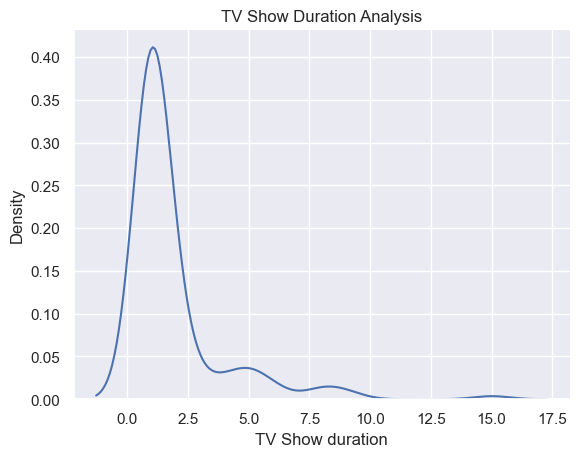

In [121]:
ax , fig = plt.subplots()
ax = sns.kdeplot(data = TvShow_df,
                x = TvShow_df['duration'],
                palette ='husl')
#styling
sns.despine()
ax.set_xlabel('TV Show duration');
ax.set_title('TV Show Duration Analysis');

Now lets see how duration changed over the years

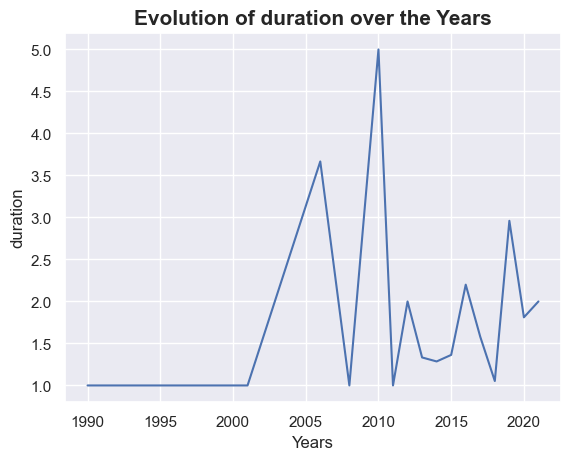

In [122]:
ax , fig = plt.subplots()
ax = sns.lineplot(data = TvShow_df , 
                 x = TvShow_df['release_year'] ,
                 y = TvShow_df['duration'],
                 palette = 'husl',
                 ci = None)
ax.set_xlabel('Years')
ax.set_title('Evolution of duration over the Years',fontsize = 15,fontweight = 'bold');

In [123]:
TvShow_df.head(5)

show_id     type            title       director  \
5        s6  TV Show               46    Serdar Akar   
132    s133  TV Show        7 (Seven)    Nizar Shafi   
218    s219  TV Show  A Queen Is Born   Carla Barros   
260    s261  TV Show         A.I.C.O.  Kazuya Murata   
276    s277  TV Show     Abby Hatcher    Kyran Kelly   

                                                  cast                country  \
5    Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...                 Turkey   
132  Rahman, Havish, Regina Cassandra, Nandita Swet...                  India   
218                      Gloria Groove, Alexia Twister                 Brazil   
260  Haruka Shiraishi, Yusuke Kobayashi, Makoto Fur...                  Japan   
276  Macy Drouin, Wyatt White, Paul Sun-Hyung Lee, ...  United States, Canada   

            date_added  release_year rating  duration                   Genre  \
5         July 1, 2017          2016  TV-MA         1  International TV Shows   
132      July 30, 2019          2019  TV-14         1                TV Shows   
218  November 11, 2020          2020  TV-14         1  International TV Shows   
260      March 9, 2018          2018  TV-14         1            Anime Series   
276       July 1, 2020          2019   TV-Y         1                Kids' TV   

                                           description Month_add Year_add  
5    A genetics professor experiments with a treatm...      July     2017  
132  Multiple women report their husbands as missin...      July     2019  
218  Gloria Groove and Alexia Twister make drag dre...  November     2020  
260  Everything Aiko knew was a lie. Now she's join...     March     2018  
276  A big-hearted girl helps her Fuzzly friends wh...      July     2020

Extracting Tv Shows by their name and no of seasons

In [124]:
columns = ['title','duration']
Tv_Show  = TvShow_df[columns]

Now lets sort it out 

In [125]:
Tv_Show = Tv_Show.sort_values(by = 'duration', ascending = False)
Tv_Show.head(10)

title  duration
5912                      Supernatural        15
4404                            Naruto         9
1181                  Call the Midwife         9
584                              Arrow         8
6415     The Great British Baking Show         8
5291                       Royal Pains         8
6359                         The Flash         6
2130                      Father Brown         6
1470  Comedians in Cars Getting Coffee         6
2313  Fullmetal Alchemist: Brotherhood         5

In [126]:
Top20 = Tv_Show.head(20)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


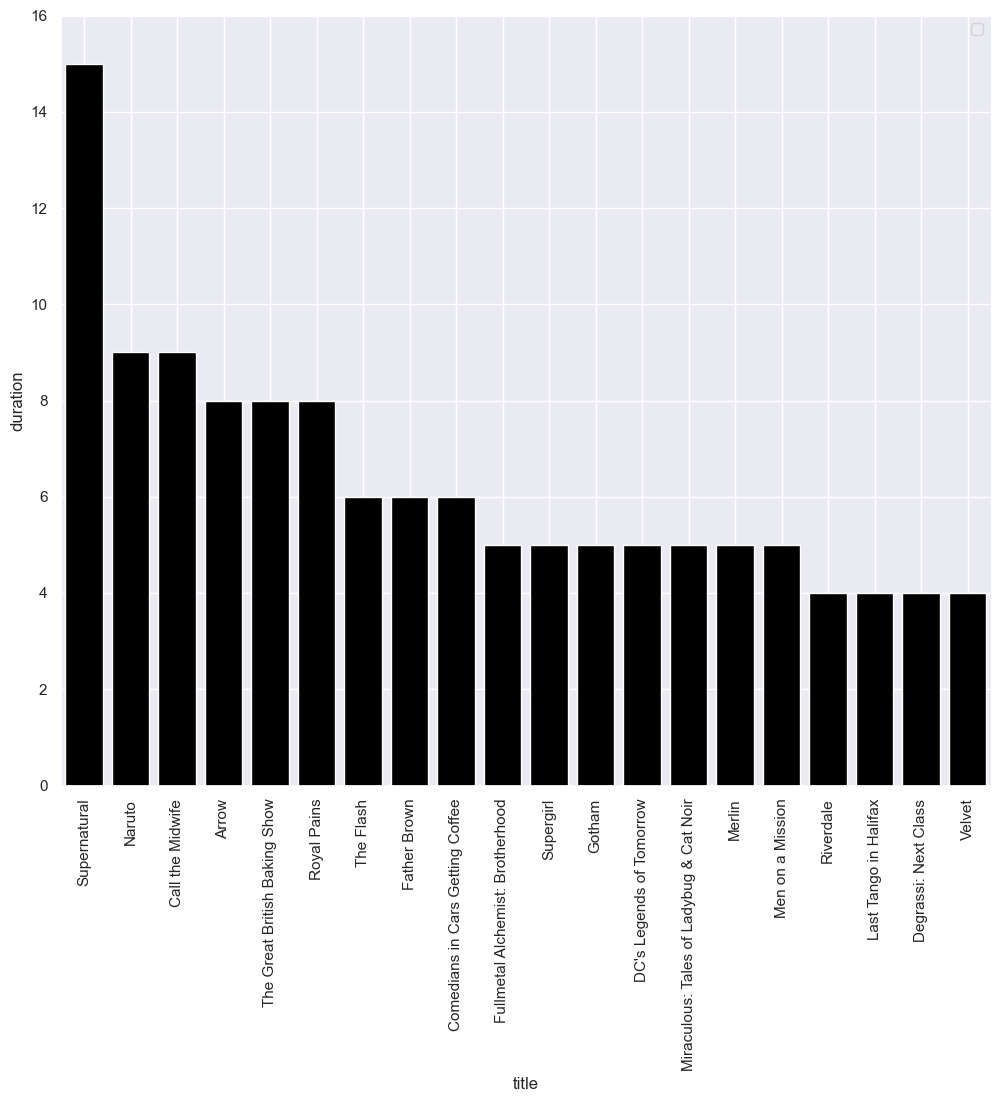

In [127]:
#ploting graph now
ax , fig = plt.subplots(figsize = (12,10))
ax = sns.barplot(data = Top20 , x = Top20['title'] , y = Top20['duration'],
                 color = 'black')
plt.xticks(rotation = 90);
ax.set_ylim(0,16);
plt.grid(True)
plt.legend(loc = True);
sns.despine()

Supernatural and Naruto have highest duration

#### Now creating a pie chart

#### Checking which country has highest Movie's made

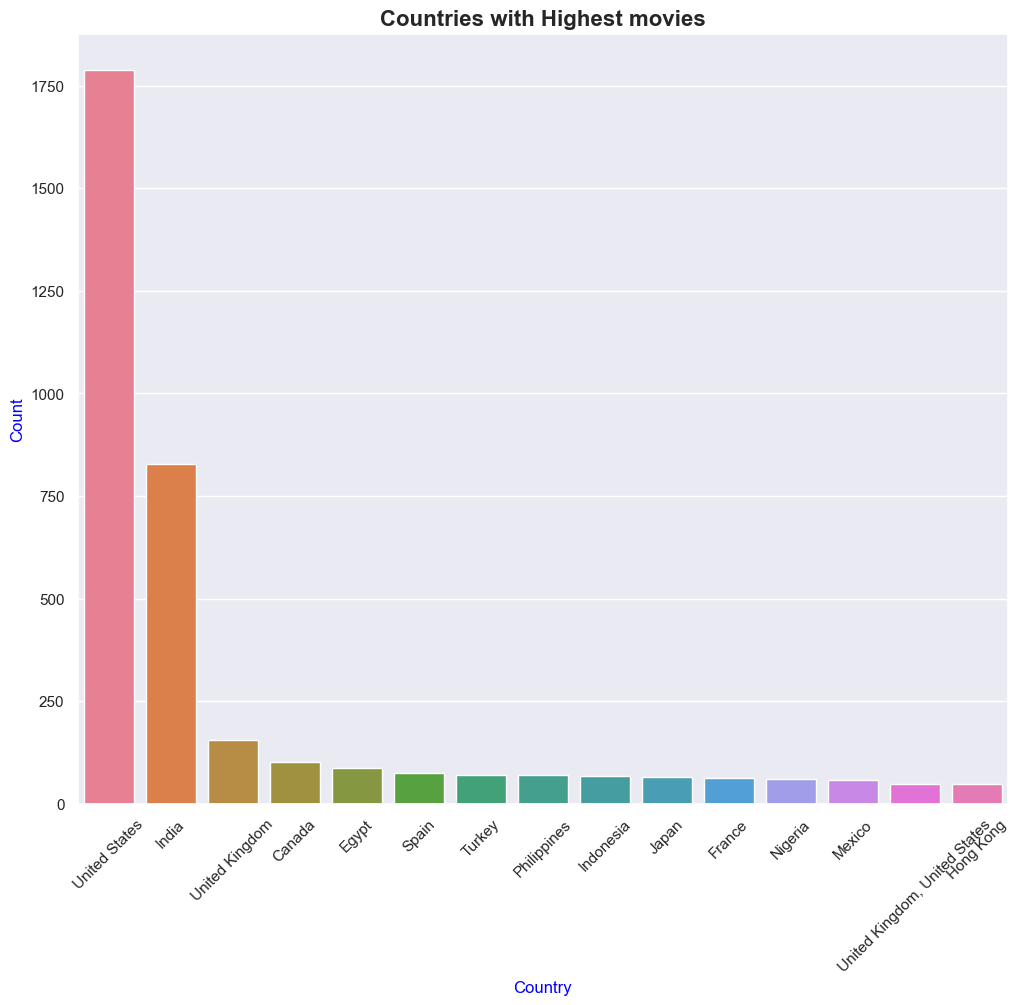

In [128]:
ax , fig = plt.subplots(figsize = (12,10))
ax = sns.countplot(data = Movie_df , 
                  x = Movie_df['country'],
                  palette = 'husl',
                  order = Movie_df['country'].value_counts().index[0:15])
sns.set(style = 'darkgrid',
        context = 'notebook')
ax.set_xlabel('Country',color = 'blue');
ax.set_ylabel('Count',color = 'blue');
ax.set_title('Countries with Highest movies',fontsize = 16,fontweight = 'bold');
plt.xticks(rotation = 45);

Now lets understand which country has what genre

In [129]:
columns = ['Genre','country']
Cgen_df = Movie_df[columns]
Cgen_df

Genre  \
1                       Dramas   
2                Horror Movies   
3           Action & Adventure   
4                       Dramas   
6                Horror Movies   
...                        ...   
7778                  Comedies   
7780                    Dramas   
7781  Children & Family Movies   
7782                    Dramas   
7783                    Dramas   

                                                country  
1                                                Mexico  
2                                             Singapore  
3                                         United States  
4                                         United States  
6                                                 Egypt  
...                                                 ...  
7778                                      United States  
7780                                              India  
7781                                      United States  
7782  Sweden, Czech Republic, United Kingdom, Denmar...  
7783                                              India  

[4834 rows x 2 columns]

In [130]:
Cgen_df['Genre'].value_counts()

Genre
Dramas                      1372
Comedies                    1054
Action & Adventure           711
Children & Family Movies     453
Documentaries                365
Stand-Up Comedy              296
Horror Movies                243
International Movies         109
Classic Movies                69
Thrillers                     49
Movies                        32
Independent Movies            20
Anime Features                18
Music & Musicals              17
Sci-Fi & Fantasy              11
Cult Movies                   11
Romantic Movies                3
LGBTQ Movies                   1
Name: count, dtype: int64

In [131]:
size = Cgen_df['Genre'].value_counts().tolist()

### Plotting Sqauarify

In [ ]:
ax , fig= plt.subplots(20,20)
ax = squarify.plot(value = Cgen_df['Genre'] , label = Cgen_df['country'], sizes = size ,alpha = 0.8)
plt.rc('font', size=14)

## Lets see no of content in Diff years

- **`release = df_netflix['release_year'].value_counts()`**:
  - We're starting by creating a variable called `release`.
  - We have a dataset called `df_netflix`, and we're interested in a column called 'release_year' in that dataset.
  - We're using `value_counts()` to count how many times each unique year appears in that column.
  - This is a bit like tallying how many times each year appears, which can help us see how many things were released in each year.

- **`release = release.sort_index(ascending=True)`**:
  - Now, we're sorting those year counts in ascending order.
  - Think of it like organizing a list of years from the oldest to the newest.
  - So, we'll have a nice sequence of years to work with.

In [149]:
release = df_netflix['release_year'].value_counts()
release = release.sort_index(ascending  = True)

In [150]:
release

release_year
1942      1
1944      1
1945      1
1946      1
1947      1
       ... 
2017    662
2018    660
2019    524
2020    400
2021      9
Name: count, Length: 71, dtype: int64

1. Next, we're using Seaborn to create a line plot:   
`ax = sns.lineplot(release[-11:-1])`
   - We're drawing a line on our canvas, showing data points over time. In this case, it'srepresenting last 10 years.

2. We're adding some scattered points on top of our line plot:  
`ax = sns.scatterplot(x = release[-11:-1].index ,y = release[-11 : -1].values , color = 'red' , size = 0.003*release[-11 : -1].values)`
   - This is step is  sprinkling some dots on our line to highlight specific data points. The dots are red and their size depends on the data values.

3. We're turning off the grid lines on our chart:   
`plt.grid(False)`
 
4. We're rotating the x-axis labels by 60 degrees: `plt.xticks(rotation = 60)`

5. We're specifying the exact positions for the x-axis labels:   
`plt.xticks(release[-11:-1].index);`
   - This is like saying, "I want the year labels to appear at these specific points on the x-axis." It helps with customizing the chart.
6. Finally, we're adding labels to our chart

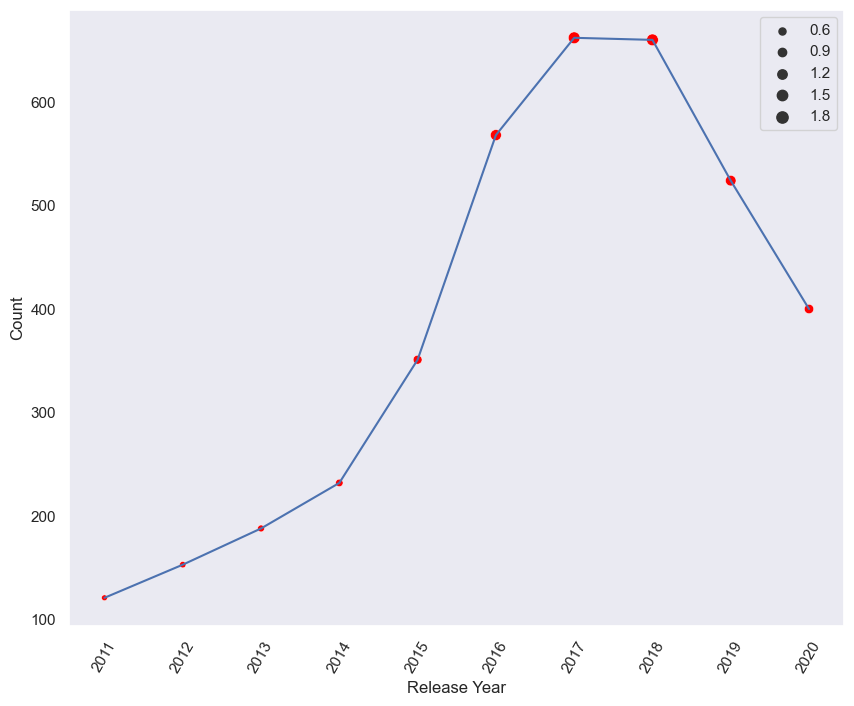

In [162]:
ax , fig = plt.subplots(figsize = (10,8))
ax = sns.lineplot(release[-11:-1])
ax = sns.scatterplot(x = release[-11:-1].index ,y = release[-11 : -1].values ,
                     color = 'red' , size = 0.003*release[-11 : -1].values)
plt.grid(False)

plt.xticks(rotation = 60)
plt.xticks(release[-11:-1].index);

ax.set( xlabel = 'Release Year',
        ylabel = 'Count');

## Directors with most number of movies

director
Raúl Campos, Jan Suter    18
Marcus Raboy              15
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Martin Scorsese           12
Youssef Chahine           12
Steven Spielberg          10
David Dhawan               9
Lance Bangs                8
Hakan Algül                8
Name: count, dtype: int64

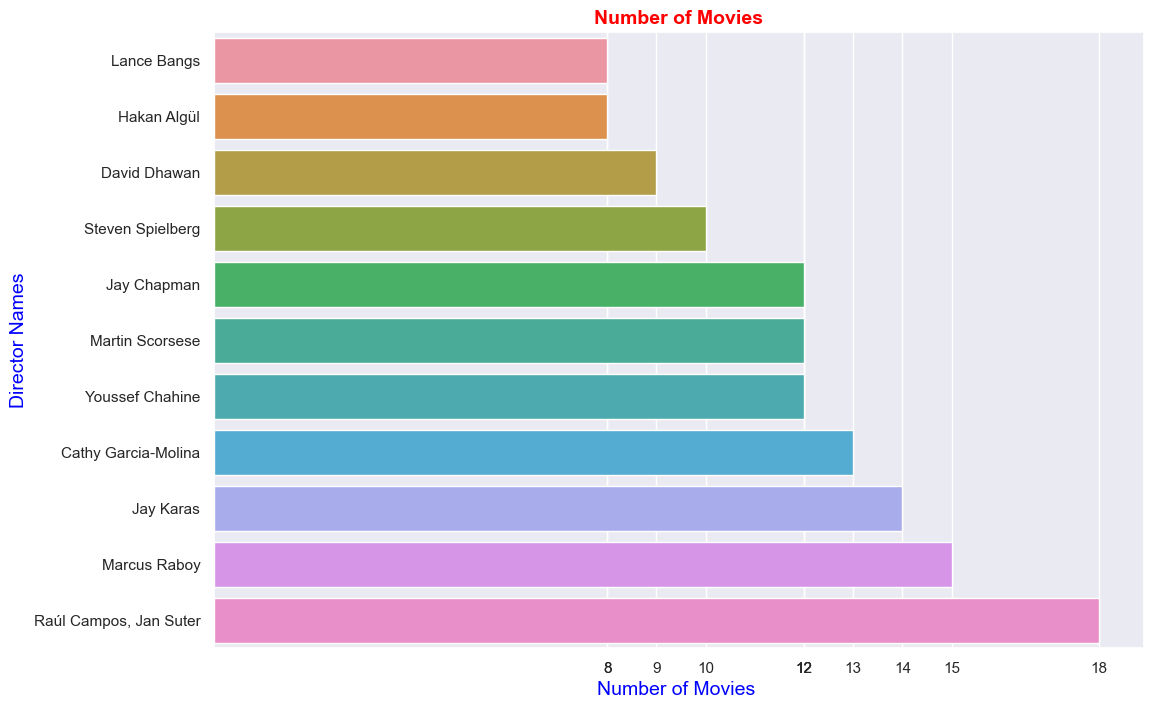

In [172]:
ax , fig = plt.subplots(figsize = (12,8))
ax = sns.barplot(data = Movie_df,
                x = Movie_df['director'].value_counts()[:11].sort_values().values ,
                y = Movie_df['director'].value_counts()[:11].sort_values().index )

plt.xticks(Movie_df['director'].value_counts()[:11].sort_values().values);

ax.set_xlabel( 'Number of Movies ', fontsize = 14 , color = 'blue');
ax.set_ylabel ( 'Director Names' , fontsize = 14 , color = 'blue');
ax.set_title ( 'Number of Movies' , fontsize = 14 , color = 'red',fontweight = 'bold');